<a href="https://colab.research.google.com/github/mjdares/Beginning/blob/main/PlantData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
file_path = "/content/Plant_1_Generation_Data.csv"  # Update with the correct path if needed
plant_data = pd.read_csv(file_path)


In [5]:
# Convert DATE_TIME to datetime format
plant_data["DATE_TIME"] = pd.to_datetime(plant_data["DATE_TIME"], format="%d-%m-%Y %H:%M")


In [6]:
# Select relevant numerical columns
data_for_model = plant_data[["DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD"]]


In [7]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_model)


In [8]:
# Anomaly detection using Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
plant_data["ANOMALY"] = model.fit_predict(data_scaled)



In [9]:
# Extract anomalies
anomalies = plant_data[plant_data["ANOMALY"] == -1]

In [10]:
# Display summary
print(f"Total anomalies detected: {anomalies.shape[0]}")
print(anomalies.head())

Total anomalies detected: 33915
              DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER   AC_POWER  \
511 2020-05-15 06:00:00   4135001  1IF53ai7Xc0U56Y   53.500000   5.162500   
522 2020-05-15 06:00:00   4135001  ih0vzX44oOqAx2f   50.166667   4.850000   
531 2020-05-15 06:15:00   4135001  1BY6WEcLGh8j5v7  278.000000  26.862500   
532 2020-05-15 06:15:00   4135001  1IF53ai7Xc0U56Y  310.571429  30.014286   
534 2020-05-15 06:15:00   4135001  7JYdWkrLSPkdwr4  316.250000  30.562500   

     DAILY_YIELD  TOTAL_YIELD  ANOMALY  
511        0.000  6183645.000       -1  
522        0.000  6185184.000       -1  
531        2.625  6259561.625       -1  
532        3.000  6183648.000       -1  
534        3.500  7602963.500       -1  


In [11]:
# Save anomalies to a CSV file
anomalies.to_csv("Anomalies_Detected.csv", index=False)

In [12]:
# Count total anomalies
total_anomalies = plant_data[plant_data["ANOMALY"] == -1].shape[0]

# Total data points
total_rows = plant_data.shape[0]

# Percentage of anomalies
anomaly_percentage = (total_anomalies / total_rows) * 100

print(f"Total anomalies detected: {total_anomalies} out of {total_rows} rows")
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


Total anomalies detected: 33915 out of 68778 rows
Percentage of anomalies: 49.31%


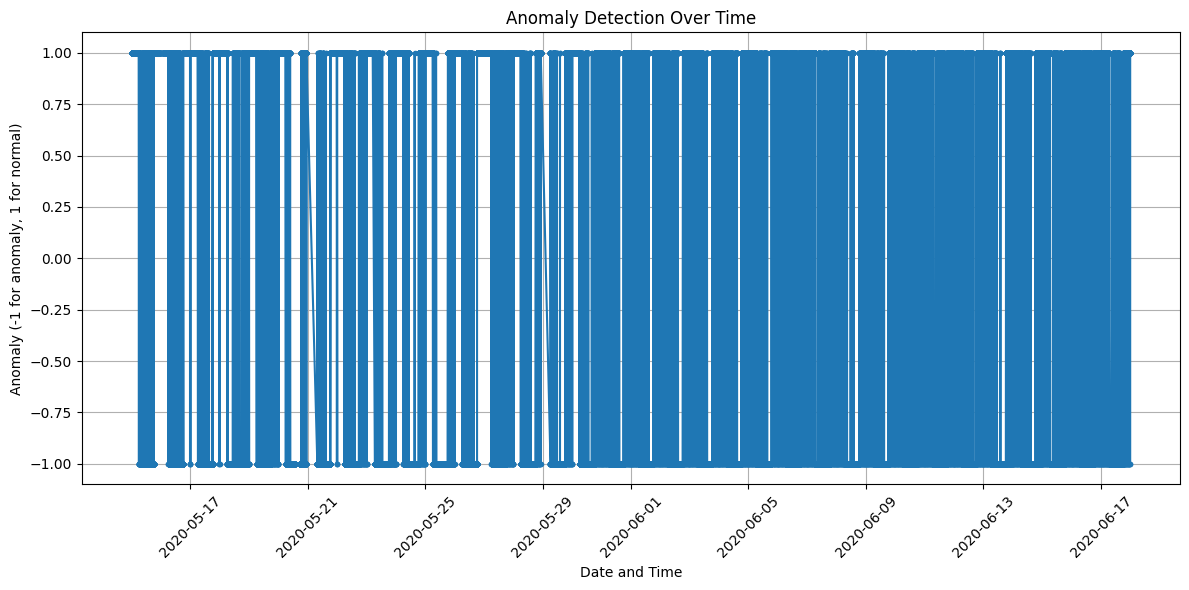

In [13]:


import matplotlib.pyplot as plt

# Assuming 'plant_data' DataFrame is already created and contains 'DATE_TIME' and 'ANOMALY' columns

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(plant_data["DATE_TIME"], plant_data["ANOMALY"], marker='o', linestyle='-', markersize=3)
plt.xlabel("Date and Time")
plt.ylabel("Anomaly (-1 for anomaly, 1 for normal)")
plt.title("Anomaly Detection Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Total anomalies detected: 33915
              DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER   AC_POWER  \
511 2020-05-15 06:00:00   4135001  1IF53ai7Xc0U56Y   53.500000   5.162500   
522 2020-05-15 06:00:00   4135001  ih0vzX44oOqAx2f   50.166667   4.850000   
531 2020-05-15 06:15:00   4135001  1BY6WEcLGh8j5v7  278.000000  26.862500   
532 2020-05-15 06:15:00   4135001  1IF53ai7Xc0U56Y  310.571429  30.014286   
534 2020-05-15 06:15:00   4135001  7JYdWkrLSPkdwr4  316.250000  30.562500   

     DAILY_YIELD  TOTAL_YIELD  ANOMALY  
511        0.000  6183645.000       -1  
522        0.000  6185184.000       -1  
531        2.625  6259561.625       -1  
532        3.000  6183648.000       -1  
534        3.500  7602963.500       -1  
Total anomalies detected: 33915 out of 68778 rows
Percentage of anomalies: 49.31%


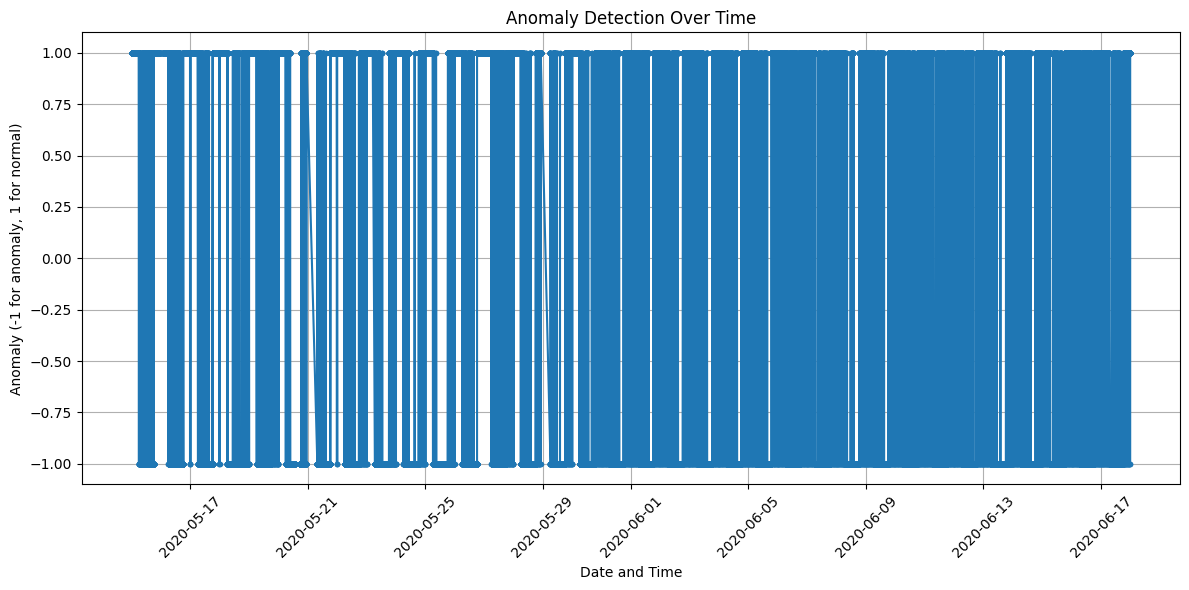

In [15]:


import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Plant_1_Generation_Data.csv"  # Update with the correct path if needed
try:
    plant_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
    exit()

# Convert DATE_TIME to datetime format
try:
    plant_data["DATE_TIME"] = pd.to_datetime(plant_data["DATE_TIME"], format="%d-%m-%Y %H:%M")
except KeyError:
    print("Error: 'DATE_TIME' column not found in the dataset.")
    exit()
except ValueError:
    print("Error: Invalid date format in 'DATE_TIME' column. Check the format.")
    exit()

# Select relevant numerical columns
required_cols = ["DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD"]
if not all(col in plant_data.columns for col in required_cols):
    print("Error: Not all required columns are present in the dataset.")
    missing_cols = set(required_cols) - set(plant_data.columns)
    print(f"Missing columns: {missing_cols}")
    exit()
data_for_model = plant_data[required_cols]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_model)

# Anomaly detection using Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
plant_data["ANOMALY"] = model.fit_predict(data_scaled)

# Extract anomalies
anomalies = plant_data[plant_data["ANOMALY"] == -1]

# Display summary
print(f"Total anomalies detected: {anomalies.shape[0]}")
print(anomalies.head())

# Save anomalies to a CSV file
anomalies.to_csv("Anomalies_Detected.csv", index=False)

# Count total anomalies
total_anomalies = plant_data[plant_data["ANOMALY"] == -1].shape[0]

# Total data points
total_rows = plant_data.shape[0]

# Percentage of anomalies
anomaly_percentage = (total_anomalies / total_rows) * 100

print(f"Total anomalies detected: {total_anomalies} out of {total_rows} rows")
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(plant_data["DATE_TIME"], plant_data["ANOMALY"], marker='o', linestyle='-', markersize=3)
plt.xlabel("Date and Time")
plt.ylabel("Anomaly (-1 for anomaly, 1 for normal)")
plt.title("Anomaly Detection Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
